# Figure 2: Overview of the post-processing steps

In [7]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm

APJ_SINGLE_COL = 3.5
APJ_DOUBLE_COL = 7.
TEXTSIZE=12

cmap = cm.plasma.copy()
cmap.set_bad(color='gray')

In [8]:
dirin = '../data/post_processing/'
order = 2
datacube_norm = np.load(dirin + 'data_norm.npy')
datacube_raw = np.load(dirin + 'data_raw.npy')
datacube_mask = np.load(dirin + 'mask_70.npy')
datacube_res = np.load(dirin + 'data_res.npy')
datacube_res_inj = np.load(dirin + 'data_res_inj.npy')
wlgrid = np.load(dirin + 'wlgrid.npy')
ph_arr = np.load(dirin + 'ph_arr.npy')

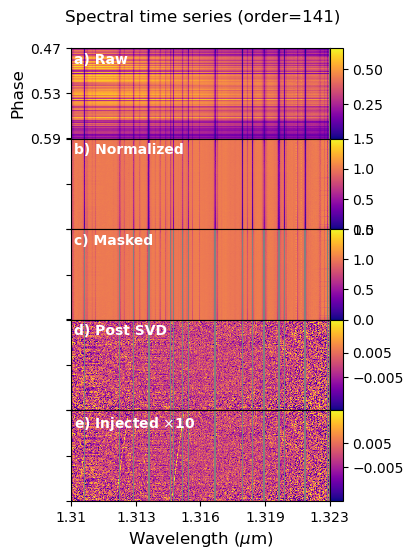

In [9]:
no, nf, nx = datacube_raw.shape

fig = plt.figure(figsize=(APJ_SINGLE_COL, APJ_SINGLE_COL*1.68))
ar=4
gs = gridspec.GridSpec(ncols=2, nrows=5, width_ratios=[1,0.05], wspace=0., hspace=0.0)
ax1 = fig.add_subplot(gs[0,0])
cax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
cax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[2,0])
cax3 = fig.add_subplot(gs[2,1])
ax4 = fig.add_subplot(gs[3,0])
cax4 = fig.add_subplot(gs[3,1])
ax5 = fig.add_subplot(gs[4,0])
cax5 = fig.add_subplot(gs[4,1])

ytl = np.round(np.linspace(ph_arr.min(), ph_arr.max(), 3), 2)

masked_datacube_raw = np.ma.masked_array(datacube_raw, mask=datacube_raw <= 0.)
im1 = ax1.imshow(masked_datacube_raw[order]/np.max(datacube_raw), aspect=ar, cmap=cmap, interpolation='none')
cbar1 = plt.colorbar(mappable=im1, cax=cax1)
ax1.set_xticks([1,nx*0.25,nx*0.5,nx*0.75,nx])
ax1.set_xticklabels([])
ax1.set_yticks([0,nf*0.5,nf-1])
ax1.set_yticklabels(ytl, size=TEXTSIZE-2)
cax1.tick_params(labelsize=TEXTSIZE-2)
ax1.set_ylabel('Phase', size=TEXTSIZE)

masked_datacube_norm = np.ma.masked_array(datacube_norm, mask=datacube_raw <= 0.)
im2 = ax2.imshow(masked_datacube_norm[order], aspect=ar, cmap=cmap, vmin=0, vmax=1.5, interpolation='none')
cbar3 = plt.colorbar(mappable=im2, cax=cax2)
ax2.set_xticks([1,nx*0.25,nx*0.5,nx*0.75,nx])
ax2.set_xticklabels([])
ax2.set_yticks([0,nf*0.5,nf-1])
ax2.set_yticklabels(ytl, size=TEXTSIZE)
ax2.set_yticklabels([])
cax2.tick_params(labelsize=TEXTSIZE-2)

masked_datacube_norm = np.ma.masked_array(datacube_norm, mask=datacube_mask)
im3 = ax3.imshow(masked_datacube_norm[order], aspect=ar, cmap=cmap, vmin=0, vmax=1.5, interpolation='none')
cbar3 = plt.colorbar(mappable=im3, cax=cax3)
ax3.set_xticks([1,nx*0.25,nx*0.5,nx*0.75,nx])
ax3.set_xticklabels([])
ax3.set_yticks([0,nf*0.5,nf-1])
ax3.set_yticklabels(ytl, size=TEXTSIZE)
ax3.set_yticklabels([])
cax3.tick_params(labelsize=TEXTSIZE-2)

masked_datacube_res = np.ma.masked_array(datacube_res, mask=datacube_mask)
im4 = ax4.imshow(masked_datacube_res[order], aspect=ar, cmap=cmap, interpolation='none')
cbar4 = plt.colorbar(mappable=im4, cax=cax4)
ax4.set_xticks([1,nx*0.25,nx*0.5,nx*0.75,nx])
ax4.set_xticklabels([])
ax4.set_yticks([0,nf*0.5,nf-1])
ax4.set_yticklabels(ytl, size=TEXTSIZE)
ax4.set_yticklabels([])
cax4.tick_params(labelsize=TEXTSIZE-2)
cax4.set_yticks([-0.5e-2, 0.5e-2])

masked_datacube_res_inj = np.ma.masked_array(datacube_res_inj, mask=datacube_mask)
im5 = ax5.imshow(masked_datacube_res_inj[order], aspect=ar, cmap=cmap, interpolation='none')
cbar5 = plt.colorbar(mappable=im5, cax=cax5)
ax5.set_xticks([1,nx*0.25,nx*0.5,nx*0.75,nx])
ax5.set_xticklabels([])
ax5.set_yticks([0,nf*0.5,nf-1])
wls = wlgrid[order]
xtl = np.round(np.linspace(wls.min(), wls.max(), 5), 3)
ax5.set_xticklabels(xtl, size=TEXTSIZE)
ax5.set_yticklabels(ytl, size=TEXTSIZE)
ax5.set_yticklabels([])
cax5.tick_params(labelsize=TEXTSIZE-2)
ax5.tick_params(labelsize=TEXTSIZE-2)
cax5.set_yticks([-0.5e-2, 0.5e-2])
ax5.set_xlabel(r'Wavelength ($\mu$m)', size=TEXTSIZE)

pos = (0.01, 0.95)
ax1.annotate(r'a) Raw', xy=pos, xycoords='axes fraction', color='w', size=TEXTSIZE-2,
                 ha='left',  va='top', rotation=0, fontweight='bold', clip_on=False)
ax2.annotate(r'b) Normalized', xy=pos, xycoords='axes fraction', color='w', size=TEXTSIZE-2,
                 ha='left',  va='top', rotation=0, fontweight='bold', clip_on=False)
ax3.annotate(r'c) Masked', xy=pos, xycoords='axes fraction', color='w', size=TEXTSIZE-2,
                 ha='left',  va='top', rotation=0, fontweight='bold', clip_on=False)
ax4.annotate(r'd) Post SVD', xy=pos, xycoords='axes fraction', color='w', size=TEXTSIZE-2,
                 ha='left',  va='top', rotation=0, fontweight='bold', clip_on=False)
ax5.annotate(r'e) Injected $\times$10', xy=pos, xycoords='axes fraction', color='w', size=TEXTSIZE-2,
                 ha='left',  va='top', rotation=0, fontweight='bold', clip_on=False)

plt.suptitle(f'Spectral time series (order={139+order})', size=TEXTSIZE,x=0.5,y=0.945)
plt.savefig('../figures/Fig2_processing_steps.pdf', bbox_inches='tight')
plt.savefig('../figures/Fig2_processing_steps.png', dpi=200, bbox_inches='tight')
plt.show()